In [1]:
# Устанавливаем библиотеку detecto
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Импортируем модули
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
import numpy as np
from pathlib import Path

In [3]:
# Подключаем гугл диск, где хранятся веса дообученной модели и тестовая картинка
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive

# Задаем текущую директорию
root_dir = Path().cwd()
print(root_dir)

/content/drive/MyDrive
/content/drive/MyDrive
/content/drive/MyDrive


In [5]:
# Задаём список меток и путь к сохранённым весам дообученной в detecto модели.
labels = ['0','1','2','3','4','5','6','7','8','9', 'А', 'В', 'С', 'Е', 'Н', 'К', 'М', 'О', 'Р', 'Т', 'Х', 'У']
#path_to_weights = 'detecto/model/model_weights_2.pth'
path_to_weights = root_dir.joinpath('detecto/model/', 'model_weights_2.pth')

In [6]:
# Инициализируем модель с нашими весами и метками. 
model_inference = core.Model.load(path_to_weights, labels)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/content/drive/MyDrive/test_plate.png


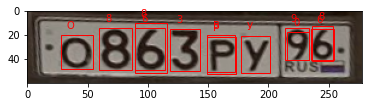

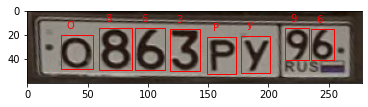

In [7]:
# Читаем тестовый файл с диска, подаём его в модель, получаем метки классов, координаты баундинг боксов и увернность модели.
#image_predict = utils.read_image("test_plate.png")
path_to_img = str(root_dir.joinpath(root_dir,'test_plate.png'))
print(path_to_img)
image_predict = utils.read_image(path_to_img)
predictions = model_inference.predict(image_predict)
labels2, boxes, scores = predictions

# Выведем номер со всеми найденными моделью баундинг боксами и метками.
show_labeled_image(image_predict, boxes, labels2)

# Задаем порог. Если уверенность модели меньше порога то не выводим такие баундинг боксы.
thresh=0.6
filtered_indices=np.where(scores>thresh)
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels2[i] for i in num_list]

# Выведем номер с баундинг боксами и метками в которых модель наиболее уверена
show_labeled_image(image_predict, filtered_boxes, filtered_labels)

In [8]:
# Так как получаем метки классов в перемешанном виде (не в той последовательности, как на номере)
# то будем их сортировать по кординате xmin сделав словарь. 
symbols_dict = {}
number_symbols = filtered_boxes.shape[0]
for i in range(0,number_symbols):
  symbols_dict[float(filtered_boxes[i][0])] = filtered_labels[i]
  
print(list(dict(sorted(symbols_dict.items())).values()))
print("".join(list(dict(sorted(symbols_dict.items())).values())))

['О', '8', '6', '3', 'Р', 'У', '9', '6']
О863РУ96


In [ ]:
# Видим что на тестовой картинке модель смогла найти символы и правильно их распознать.